<function matplotlib.pyplot.show(close=None, block=None)>

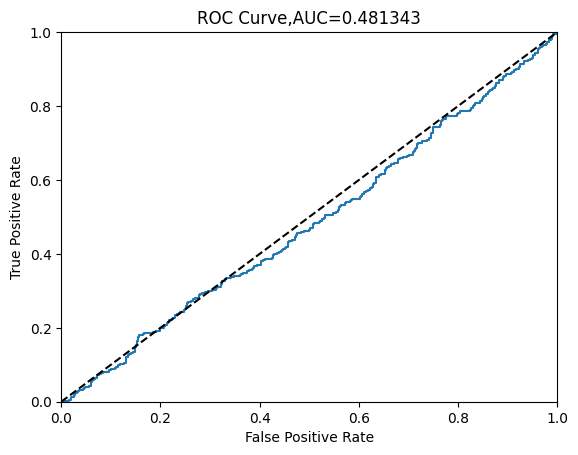

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#Estsblecer semilla aleatoria
np.random.seed(0)

#generar etiquetas classes
y=np.random.randint(0,2,1000)

#generar puntuacion de prediccion 
y_scores_random = np.random.rand(len(y))

#ordenar puntuaciones y las verdaderas etiquetas en orden descendentes de puntuacion
sort_indices = np.argsort(y_scores_random)[::-1]
y_sorted = y[sort_indices]

#Calcular la tasa de verdaderos positivos y falsos positivos acumulados 
TP_cumsum = np.cumsum(y_sorted)
FP_cumsum = np.cumsum(1-y_sorted)

#Calcular tasa TPR y FPR
TPR = TP_cumsum / TP_cumsum[-1]
FPR = FP_cumsum / FP_cumsum[-1]



#Calcular Area bajo la curva AUC]
#Si la prediccion se acerca mas a uno es que el modelo aprendio de lo contrario nada aprendio
AUC = integrate.trapezoid(TPR,FPR)

#Plot ROC curve
# si el ROC es menos a 0.45 quiere decir que el modelo para predecir no es muy bueno deberia de estar arriba de la linea punteada
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel ("False Positive Rate")
plt.ylabel ("True Positive Rate")
plt.title ("ROC Curve,AUC={:2f}".format(AUC))
plt.show
